### clustering on wine data

### Heirarchical clustering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_data = pd.read_csv('wine.csv')

In [3]:
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
wine_data.describe

<bound method NDFrame.describe of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoid

In [5]:
#Normalization function

In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
#Considering only numerical part normalized the dataframe
df_norm = norm_func(wine_data.iloc[:,1:])

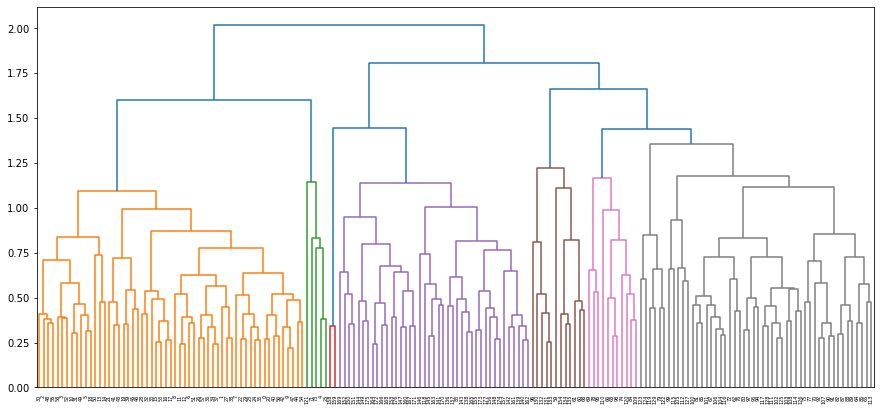

In [8]:
#plot Dendrogram
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [9]:
#Create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [10]:
y_hc = hc.fit_predict(df_norm)

In [11]:
clusters = pd.DataFrame(y_hc, columns = ['Clusters'])
clusters

Clusters
0           0
1           0
2           0
3           0
4           0
..        ...
173         0
174         0
175         0
176         0
177         0

[178 rows x 1 columns]

In [12]:
#Assign clusters to the dataset
wine_data['hclusterid'] = hc.labels_
wine_data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     hclusterid  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
173           0  
174           0  
175           0  
176           0  
177           0  

[178 rows x 15 columns]

## K-means hierarchical clustering 

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
#Normalization func
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine_data.iloc[:,:])


In [15]:
#How to find optimum number of clusters
#The K-Means algorithm aims to choose centroids that minimise the inertia

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


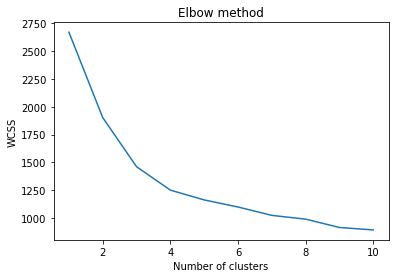

In [16]:
#Elbow curve
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_wine_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=1150)
clusters_new.fit(scaled_wine_df)

KMeans(n_clusters=4, random_state=1150)

In [18]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [19]:
#Assgning clusters to dataset
wine_data['kclusterid'] = clusters_new.labels_
wine_data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     hclusterid  kclusterid  
0             0           2  
1             0           2  
2             0           2  
3             0           2  
4             0           2  
..          ...         ...  
173           0           1  
174           0           1  
175           0           1  
176           0           1  
177           0           1  

[178 rows x 16 columns]

In [20]:
clusters_new.cluster_centers_

array([[ 0.07996036, -0.85062566, -0.76512167, -0.0749961 ,  0.69817948,
         2.92497732,  0.40200518,  0.6472878 , -0.51452261,  1.54726746,
        -0.61342312,  0.83600986,  0.60496989,  0.07676777,  5.24603846],
       [ 1.34745816,  0.18654314,  0.90497145,  0.24921026,  0.58370348,
        -0.05063539, -0.988557  , -1.23619475,  0.71684172, -0.74960756,
         0.98849829, -1.19129878, -1.30153966, -0.38004461, -0.15161961],
       [-1.21394365,  0.91919498, -0.29234227,  0.32560449, -0.73799712,
         0.4632262 ,  0.87336224,  0.95688391, -0.57898505,  0.54038332,
         0.20340098,  0.45884745,  0.77135086,  1.17450054, -0.15161961],
       [ 0.07996036, -0.9095383 , -0.35799691, -0.47764596,  0.17614557,
        -0.60729381, -0.07844777,  0.01355312,  0.02473057, -0.04443358,
        -0.88261474,  0.41725525,  0.23447527, -0.78549515, -0.15161961]])

In [21]:
wine_data.groupby('kclusterid').agg(['mean']).reset_index()

kclusterid      Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
0          0  2.000000  12.312000  1.484000  2.346000  21.820000  141.400000   
1          1  2.979592  13.151633  3.344490  2.434694  21.438776   99.020408   
2          2  1.000000  13.744746  2.010678  2.455593  17.037288  106.338983   
3          3  2.000000  12.264308  1.937538  2.235846  20.081538   91.092308   

    Phenols Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
       mean       mean          mean            mean      mean      mean   
0  2.546000   2.674000      0.298000        2.474000  3.640000  1.148000   
1  1.678163   0.797959      0.450816        1.163061  7.343265  0.685918   
2  2.840169   2.982373      0.290000        1.899322  5.528305  1.062034   
3  2.246154   2.042769      0.364923        1.565538  3.017692  1.052554   

   Dilution      Proline hclusterid  
       mean         mean       mean  
0  3.040000   771.000000        1.6  
1  1.690204   627.551020        0.0  
2  3.157797  1115.711864        0.0  
3  2.777692   500.230769        0.0

### DBSCAN

In [22]:
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  hclusterid  \
0           0.28             2.29   5.64  1.04      3.92     1065           0   
1           0.26             1.28   4.38  1.05      3.40     1050           0   
2           0.30             2.81   5.68  1.03      3.17     1185           0   
3           0.24             2.18   7.80  0.86      3.45     1480           0   
4           0.39             1.82   4.32  1.04      2.93      735           0   

   kclusterid  
0           2  
1           2  
2           2  
3           2  
4           2

In [23]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  hclusterid       178 non-null    int64  
 15  kclusterid       178 non-null    int32  
dtypes: float64(11), int32(1), int64(4)
memory usage: 21.7 KB


In [24]:
array = wine_data.values
array

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.065e+03, 0.000e+00,
        2.000e+00],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+03, 0.000e+00,
        2.000e+00],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.185e+03, 0.000e+00,
        2.000e+00],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 8.350e+02, 0.000e+00,
        1.000e+00],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 8.400e+02, 0.000e+00,
        1.000e+00],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 5.600e+02, 0.000e+00,
        1.000e+00]])

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [26]:
#Normalizing data
stscaler = StandardScaler().fit(array)

In [27]:
X = stscaler.transform(array)

In [28]:
X

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  1.01300893,
        -0.15161961, -0.03887916],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.96524152,
        -0.15161961, -0.03887916],
       [-1.21394365,  0.19687903,  0.02123125, ...,  1.39514818,
        -0.15161961, -0.03887916],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  0.28057537,
        -0.15161961, -1.19229415],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  0.29649784,
        -0.15161961, -1.19229415],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -0.59516041,
        -0.15161961, -1.19229415]])

In [29]:
#Build model
dbscan = DBSCAN(eps=0.8,min_samples=15)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=15)

In [30]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [31]:
dbclusterid = pd.DataFrame(dbscan.labels_,columns=['dbcluster'])

In [32]:
dbclusterid

dbcluster
0           -1
1           -1
2           -1
3           -1
4           -1
..         ...
173         -1
174         -1
175         -1
176         -1
177         -1

[178 rows x 1 columns]

In [33]:
pd.concat([wine_data,dbclusterid],axis=1)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     hclusterid  kclusterid  dbcluster  
0             0           2         -1  
1             0           2         -1  
2             0           2         -1  
3             0           2         -1  
4             0           2         -1  
..          ...         ...        ...  
173           0           1         -1  
174           0           1         -1  
175           0           1         -1  
176           0           1         -1  
177           0           1         -1  

[178 rows x 17 columns]